## 07-2 이상한 데이터를 찾아라! - 이상치 정제하기

### Do it! 실습 | 존재할 수 없는 값

In [2]:
import pandas as pd

df = pd.DataFrame({
    'sex' : [1,2,1,3,2,1],
    'score' : [5,4,3,4,2,6]
})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


### 이상치 확인하기

In [3]:
df['sex'].value_counts().sort_index()

1    3
2    2
3    1
Name: sex, dtype: int64

In [4]:
df['score'].value_counts().sort_index()

2    1
3    1
4    2
5    1
6    1
Name: score, dtype: int64

### 결측 처리하기

In [6]:
import numpy as np

In [7]:
# sex가 3이면 NaN 부여
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [8]:
# score가 5보다 크면 NaN 부여
df['score'] = np.where(df['score'] > 5, np.NaN, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [9]:
df.dropna(subset=['sex', 'score']).groupby('sex').agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


### Do it! 실습 | 이상치 제거하기 - 극단적인 값

<AxesSubplot:ylabel='hwy'>

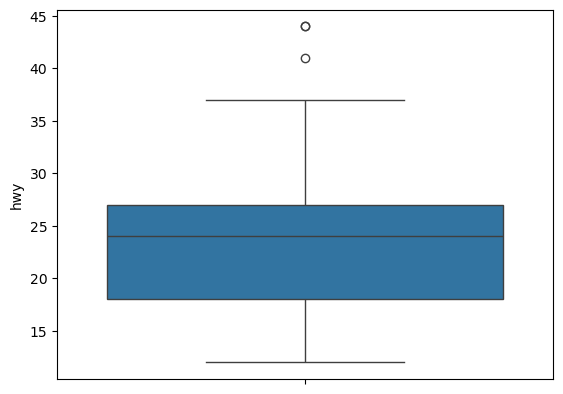

In [11]:
mpg = pd.read_csv("/Users/heohyeonjun/Desktop/We_IT_5th/weit/Data/mpg.csv") # 데이터 불러오기

import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy')

### 2. 극단치 기준값 구하기

In [13]:
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [14]:
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

In [15]:
iqr = pct75 - pct25
iqr

9.0

In [16]:
pct25 - 1.5 * iqr # 하한

4.5

In [17]:
pct75 + 1.5 * iqr # 상한

40.5

### 3. 극단치를 결측 처리하기

In [18]:
# 4.5 ~ 40.5 벗어나면 NaN 부여
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])

# 결측치 빈도 확인
mpg['hwy'].isna().sum()

3

### 4. 결측치 제거하고 분석하기

In [20]:
mpg.dropna(subset = ['hwy']).groupby('drv').agg(mean_hwy = ('hwy','mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000
